In [14]:
import numpy as np

### 3.1.3 Classification of samples that are not linearly separable

In [15]:
n = 100

# label a
mA = [5, 2]
sigma = 0.5
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, np.zeros(n)))
a.shape, a[:,:5]

((3, 100),
 array([[5.07606736, 4.65098264, 5.00525141, 3.98939319, 4.73096774],
        [2.6016961 , 2.94341353, 2.63460149, 2.1244363 , 2.09624102],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]))

In [16]:
# label b
mB = [10, 5]
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[ 9.99979939, 10.22346438, 10.3270323 , 10.19343833, 10.10907154],
        [ 5.37788476,  4.91657701,  4.70709539,  3.6284478 ,  5.13168438],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

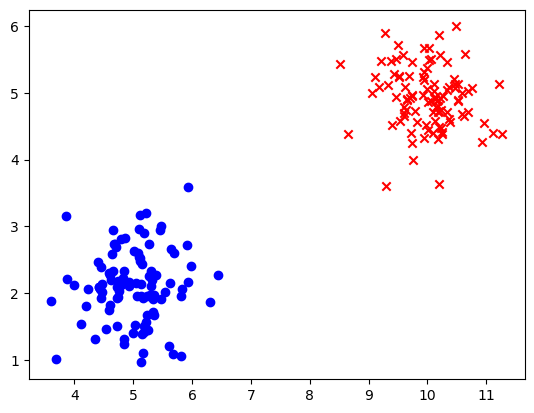

In [17]:
import matplotlib.pyplot as plt
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')

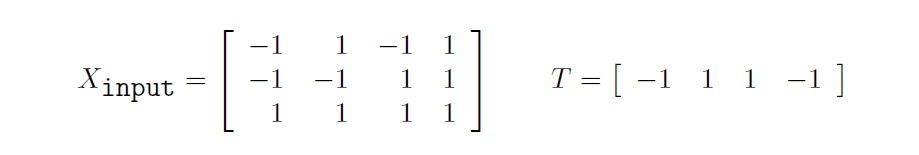

In [18]:
dataset = np.hstack((a,b))
dataset[:,:5], dataset.shape

(array([[5.07606736, 4.65098264, 5.00525141, 3.98939319, 4.73096774],
        [2.6016961 , 2.94341353, 2.63460149, 2.1244363 , 2.09624102],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 (3, 200))

In [19]:
dataset

array([[ 5.07606736,  4.65098264,  5.00525141,  3.98939319,  4.73096774,
         5.14626443,  5.18718071,  4.67411901,  5.22041812,  4.46042142,
         5.07067417,  5.03054312,  5.35905146,  4.20359845,  3.86159106,
         5.33457622,  4.92100527,  5.93438476,  4.63059961,  6.44564612,
         5.18367032,  4.72138086,  5.29453989,  5.80380758,  5.82331107,
         5.45322324,  4.41020169,  5.23932476,  5.16611492,  4.11929112,
         5.46699333,  5.26871791,  5.69346738,  4.75131546,  4.85101   ,
         5.13929024,  4.4721242 ,  4.35557879,  4.68814937,  5.33577654,
         4.85040913,  4.46707469,  5.64691808,  5.10342399,  5.53404009,
         4.54052769,  4.74178607,  5.14696715,  5.3121591 ,  4.9301835 ,
         4.83596375,  5.12169043,  4.58245366,  4.2357998 ,  5.18749489,
         5.6708969 ,  5.09593602,  5.21502348,  5.93098567,  4.7107944 ,
         4.78487294,  5.11277274,  4.61024406,  4.39349785,  5.11364637,
         5.13401387,  4.46010957,  5.05170436,  4.8

In [20]:
# shuffling the dataset horizontally...
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[3.87693334, 4.73096774, 9.61787316, 9.17527685, 5.23798912],
       [2.21110163, 2.09624102, 5.0825571 , 5.08768075, 1.95839638],
       [0.        , 0.        , 1.        , 1.        , 0.        ]])

In [21]:
dataset = np.vstack((np.ones(2*n), dataset))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [3.87693334, 4.73096774, 9.61787316, 9.17527685, 5.23798912],
        [2.21110163, 2.09624102, 5.0825571 , 5.08768075, 1.95839638],
        [0.        , 0.        , 1.        , 1.        , 0.        ]]))

In [22]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

The weights are stored in matrix W with as many columns as the dimensionality of the input patterns and with the number of rows matching the number of the
outputs (dimensionality of the output).

----------

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

In [23]:
class PerceptronLearningClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        #print(np.array((self.W @ X) > 0, dtype=int))
        return np.array((self.W @ X) > 0, dtype=int)

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for i in range(0, n_epochs):
                predictions = self.predict(X)
                e = y_train - predictions
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                nErrors = np.sum( np.array(e != 0, dtype=int) )
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
            return False
                

    def fit_one_epoch(self, X, y):
        nErrors = 0
        for i in range(0, X.shape[1]):
            prediction = np.array((self.W @ X[:,i]) > 0, dtype=int)
            e = y[i] - prediction
            if (e != 0):
                nErrors += 1
            dW = self.learning_rate * (e * X[:,i])
            self.W = self.W + dW
        print("Errors this epoch:" + str(nErrors))

In [24]:
p1 = PerceptronLearningClassifier(4)

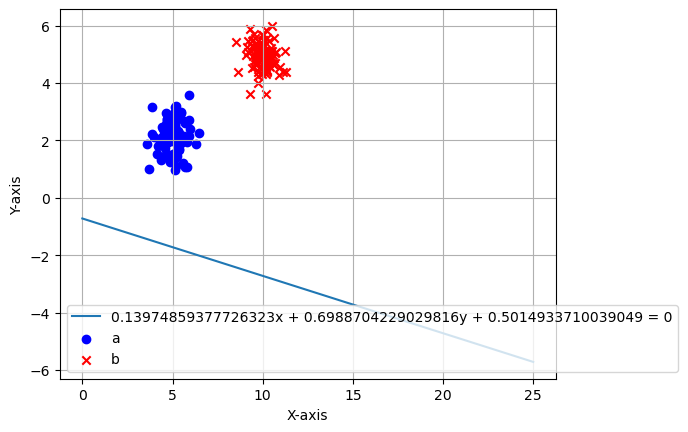

[0.50149337 0.13974859 0.69887042]


In [25]:
x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

After 0 epochs: 100 errors
After 1 epochs: 100 errors
After 2 epochs: 100 errors
After 3 epochs: 88 errors
After 4 epochs: 100 errors
After 5 epochs: 100 errors
After 6 epochs: 100 errors
After 7 epochs: 100 errors
After 8 epochs: 100 errors
After 9 epochs: 100 errors
After 10 epochs: 100 errors
After 11 epochs: 100 errors
After 12 epochs: 100 errors
After 13 epochs: 100 errors
After 14 epochs: 100 errors
After 15 epochs: 100 errors
After 16 epochs: 100 errors
After 17 epochs: 100 errors
After 18 epochs: 100 errors
After 19 epochs: 100 errors
After 20 epochs: 100 errors
After 21 epochs: 100 errors
After 22 epochs: 100 errors
After 23 epochs: 100 errors
After 24 epochs: 100 errors
After 25 epochs: 100 errors
After 26 epochs: 100 errors
After 27 epochs: 99 errors
After 28 epochs: 100 errors
After 29 epochs: 100 errors
After 30 epochs: 99 errors
After 31 epochs: 100 errors
After 32 epochs: 100 errors
After 33 epochs: 99 errors
After 34 epochs: 100 errors
After 35 epochs: 100 errors
After 

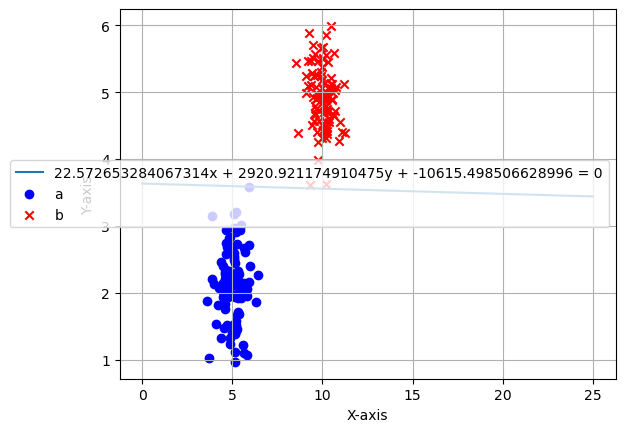

[-10615.49850663     22.57265328   2920.92117491]


In [26]:
while (p1.fit(X_train, y_train, 1) == False):
    pass


x = np.linspace(0, 25, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

------------